In [18]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills)
# a copy of the dataset
stat = rf[rf["job_title"] == "Statistician"].copy()
stat.dropna(subset="mean_salary", inplace=True)


In [ ]:
stat = stat.explode("skills_list")
two_col = stat[["mean_salary","skills_list"]]
# print(two_col)
grouped = stat.groupby("skills_list")["mean_salary"].agg(["count","median"])
# first - row, second parameters is the value we take
grouped



,count,median
skills_list,,
Data Analysis,3,21314.0
Data Cleaning,1,20911.0
Machine Learning,1,20911.0
Probability,4,21386.0
Python,3,21314.0
R,3,21314.0
Regression,4,21386.0
SAS,4,21386.0
Statistics,1,20911.0


In [24]:
# now we need to create two data frames one for top pay salaries and another one for top count skills

top_pay = grouped.sort_values(by="median", ascending=False).head(10)

top_count = grouped.sort_values(by="count",ascending=False).head(10)
top_pay

,count,median
skills_list,,
Probability,4,21386.0
Regression,4,21386.0
SAS,4,21386.0
Data Analysis,3,21314.0
Python,3,21314.0
R,3,21314.0
Data Cleaning,1,20911.0
Machine Learning,1,20911.0
Statistics,1,20911.0


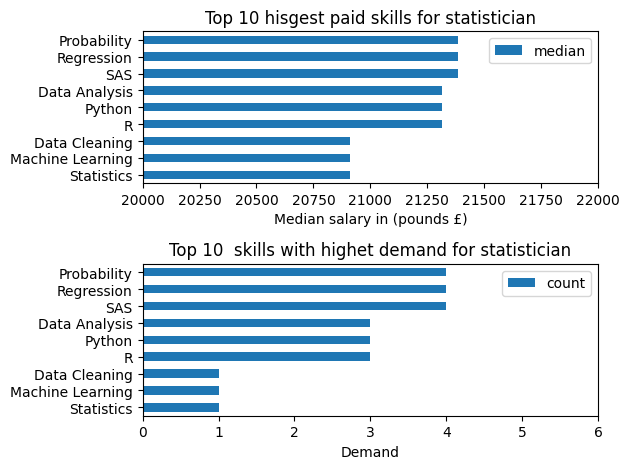

In [51]:
# since we are creating two plots we need to use subplots function

fig, ax = plt.subplots(2, 1)

top_pay.plot(kind="barh", y="median", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlim(20000,22000)
ax[0].set_title("Top 10 hisgest paid skills for statistician")
ax[0].set_ylabel("")
ax[0].set_xlabel("Median salary in (pounds £)")
top_count.plot(kind="barh", y="count",ax=ax[1])
# let now set the same length  for ax[1] as it is for ax[0]
# ax[1].set_xlim(ax[0].get_xlim())
# but it's not effective in our case
ax[1].set_title("Top 10  skills with highet demand for statistician")
ax[1].set_xlabel("Demand")
ax[1].set_ylabel("")
ax[1].invert_yaxis()
ax[1].set_xlim(0,6)

fig.tight_layout() #to overcome overlapping 
